# Grupo: Milotech

Integrantes:
RM553472 Claudio Bispo

RM552981 Patricia Naomi Yamagishi

RM553568 Sabrina da Motta Café

# Solicitação da matéria de IA

Para o entregável da nossa disciplina, vocês realizarão todas as etapas que fazem parte do dia a dia de um cientista de dados. São fornecidos 4 arquivos csv (Teams e Portal) com diferentes informações sobre poluição envolvendo plástico, e um arquivo com informações de qualidade de água para diferentes regiões. Uma coluna em comum entre todas as bases (chave primária) de dados é a coluna Entidade, que contém o nome do país associado.

# Requisitos

╸ [30 pts] Fazer uma análise exploratória de dados com os arquivos 1 a 4 (ao menos um gráfico para cada arquivo), gerando visualizações que possam trazer insights sobre a relação do plástico com o oceano e a poluição.

╸ [30 pts] Queremos treinar um modelo de ML para predizer a qualidade da água do oceano com base em dados de plástico. Combine o arquivo 5 com os arquivos de 1 a 4 (se guiando pela chave primária, e lembrando que dados do mundo real possuem problemas que precisam de atenção especial). Após juntar os dados, treine um modelo para predizer a qualidade da água com base nas outras colunas.

In [1]:
#--------------------( Importações dos dados ) --------------------#


# Analise dos dados
import pandas as pd


#--------------------( Gerar gráficos ) --------------------#

import matplotlib.pyplot as plt
import seaborn as sns

#--------------------( Realizar as previsoes) --------------------#

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#--------------------( Regressão ) --------------------#

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold


#--------------------( Classificação ) --------------------#

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analise da producao de plastico

## 1.1. Dados que estão disponíveis neste arquivo
• Entidade: Nome do país ou região (no caso dos primeiros registros, “Mundo”).

• Ano: O ano de registro da produção.

• Produção Anual de Plástico: Quantidade de plástico produzido, estamos fazendo referencia em toneladas.

## 1.2. Carregamento dos dados

In [2]:
# Carregar o arquivo CSV
df_producao_plastico = pd.read_csv('1- producao-de-plastico-global.csv')

# Exibir as primeiras  cinco linhas do dataframe e informações gerais para entendermos melhor o problema
df_producao_plastico.head()

,Entidade,Ano,Produção Anual de Plástico
0,Mundo,1950,2000000
1,Mundo,1951,2000000
2,Mundo,1952,2000000
3,Mundo,1953,3000000
4,Mundo,1954,3000000


## 1.2. Carregamento dos dados


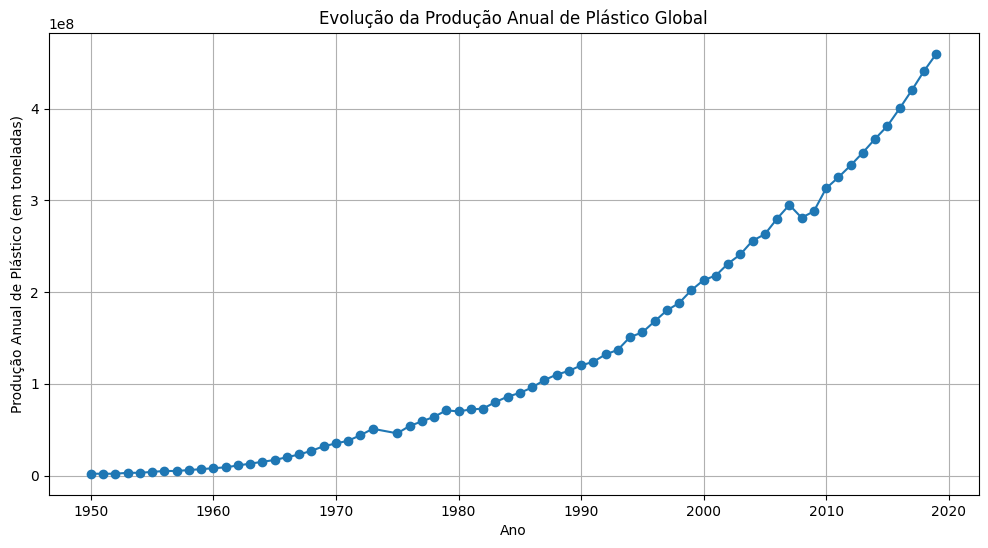

In [3]:
# Criacao um grafico de linha para visualizar a produção de plástico ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(df_producao_plastico['Ano'], df_producao_plastico['Produção Anual de Plástico'], marker='o')
plt.title('Evolução da Produção Anual de Plástico Global')
plt.xlabel('Ano')
plt.ylabel('Produção Anual de Plástico (em toneladas)')
plt.grid(True)
plt.show()

## 1.4. Análise GLOBAL sobre o tema Produçao de Plastico
Para analisar o crescimento evidente da produção anual de plásticos ao londo dos anos (1950-2020), fatos históricos devem ser considerados.

Invenção e Desenvolvimento Inicial dos Plásticos totalmente sintéticos (1907-1930s):

Devido o aumento do uso da eletricidade nos EUA em 1907, Leo Baekeland inventou a baquelite, o primeiro plástico totalmente sintético, que se mostrou um eficaz isolante, com ótima durabilidade, resistênte ao calor e pode ser moldada em quase qualquer coisa. Em um mundo em que os recursos naturais estão cada vez mais escassos materiais como esse atraem muito investimento industrial.

Em 1939 com o início da Segunda Guerra Mundial, o poder industrial era tão importante quanto a vitória militar. A necessidade de preservar os escassos recursos naturais tornou a produção de alternativas sintéticas uma prioridade. A utilização do plástico foinecessária para fabricar pára-quedas, cordas, coletes à prova de balas, forros de capacete e muito mais.

fonte: https://www.openaccessgovernment.org/the-plastic-timeline-how-did-we-get-here/102481/

https://www.sciencehistory.org/education/classroom-activities/role-playing-games/case-of-plastics/history-and-future-of-plastics/

Expansão Pós-Guerra (1950-1970s):

Após a Segunda Guerra Mundial, a produção de plástico aumentou significativamente. Produtos plásticos se tornaram populares em bens de consumo devido à sua versatilidade e custo baixo. Isso é refletido no gráfico pelo crescimento acentuado na produção a partir da década de 1950

fonte: https://www.openaccessgovernment.org/the-plastic-timeline-how-did-we-get-here/102481/

https://www.sciencehistory.org/education/classroom-activities/role-playing-games/case-of-plastics/history-and-future-of-plastics/

Crescimento da Indústria e Globalização (1980s-2000s):

A industrialização rápida e a globalização impulsionaram ainda mais a produção de plástico. A demanda por embalagens e produtos de consumo contribuiu para o aumento contínuo. A partir dos anos 1990, a industrialização em países em desenvolvimento também desempenhou um papel importante​.

fonte: https://www.openaccessgovernment.org/the-plastic-timeline-how-did-we-get-here/102481/

https://www.grida.no/resources/6923

Consciência Ambiental e Regulação (2000s em diante):

Apesar da crescente conscientização sobre os impactos ambientais dos plásticos e dos esforços regulatórios para reduzir o uso de plásticos de uso único, a produção continuou a crescer devido à demanda contínua e à expansão do comércio eletrônico, que aumenta a necessidade de embalagens plásticas​

fonte: https://www.openaccessgovernment.org/the-plastic-timeline-how-did-we-get-here/102481/

https://oceangeneration.org/history-plastic-pollution/

### 1.4.1 Análise sobre o gráfico
Análise sobre o gráfico mostra a evolução da produção anual de plástico global ao longo dos anos. É evidente um aumento significativo na produção à medida que avançamos no tempo, o que pode ser um indicativo da crescente contribuição para a poluição por plástico, especialmente nos oceanos. Os dados iniciaram em 1950 e temos uma base ate 2020, o que mostra uma base bem consolidade de quase 70 anos. O numero vem so aumentando e somente tivemos melhorias mas curtas nos anos 70,80,2008 aproximadamente.



# 2. Analise Despejo de resíduos

## 2.1. Dados que estao disponiveis neste arquivo
• Entidade: Nome do país ou região.

• Código: Código do país (alguns valores estão faltando). Esse codigo sera nosso ID principal.

• Ano: Ano do registro de dados.

• Participação na emissão global de plásticos para o oceano: Percentual que cada entidade contribui para a emissão global de plásticos no oceano.

## 2.2. Carregamento dos dados

In [4]:
df_residuos = pd.read_csv('2- participacao-despejo-residuo-plastico.csv')

df_residuos.head()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204


## 2.3. Criação do gráfico


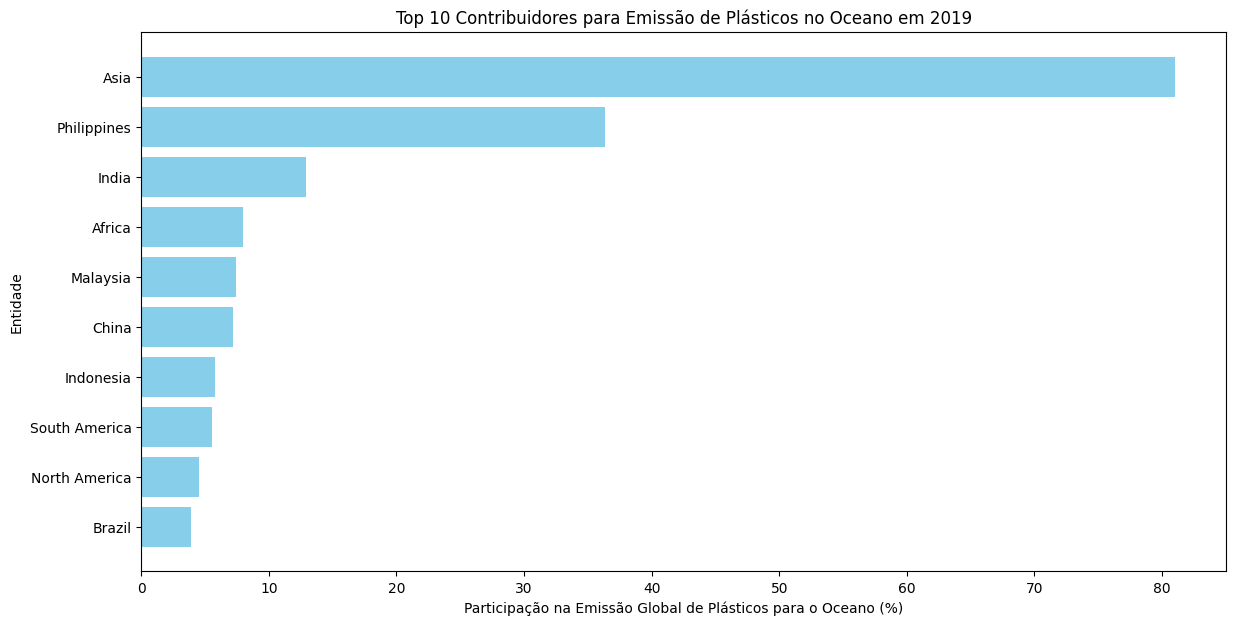

In [5]:
# Filtrar os dados para o ano mais recente disponível, 2019. Nao desejo saber dos demais aqui, por hora.
data_2019 = df_residuos[df_residuos['Ano'] == 2019]

# Ordenar os dados pelo percentual de emissão de plásticos para o oceano
sorted_data_2019 = data_2019.sort_values(by='Participação na emissão global de plásticos para o oceano', ascending=False).head(10)

# Criar um gráfico de barras
plt.figure(figsize=(14, 7))
plt.barh(sorted_data_2019['Entidade'], sorted_data_2019['Participação na emissão global de plásticos para o oceano'], color='skyblue')
plt.title('Top 10 Contribuidores para Emissão de Plásticos no Oceano em 2019')
plt.xlabel('Participação na Emissão Global de Plásticos para o Oceano (%)')
plt.ylabel('Entidade')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior contribuidor aparecer no topo
plt.show()

## 2.4. Analise sobre os residuos

No gráfico acima, mostramos os 10 principais contribuidores para a emissão de plásticos no oceano no ano de 2019. Esta visualização ajuda a destacar quais países ou regiões são responsáveis por uma maior parcela da poluição plástica nos oceanos. Para uma melhor Análise vamos nos atentar ao Brasil e à Ásia em alguns de seus países.

Filipinas: Ao contrário da crença popular, a maior parte dos resíduos plásticos não entra diretamente no mar. Por outro lado, chega ao mar a partir de riachos menores. De acordo com um estudo de 2021 , 80% dos resíduos plásticos vêm dos rios e sete dos dez rios mais poluídos por plástico do mundo estão nas Filipinas. A falta de infraestrutura adequada para gestão de resíduos e a alta densidade populacional em áreas costeiras exacerbam o problema​.

Índia: A Índia é outro grande poluidor, com desafios semelhantes aos das Filipinas, incluindo a gestão ineficiente de resíduos e a prática generalizada de descarte inadequado de lixo​.

China: Até 2017, o país era o maior importador de plástico . Desde a introdução da proibição de importação de resíduos em 2018, incluindo diferentes tipos de plásticos, as coisas mudaram drasticamente. A proibição reduziu efetivamente para metade a quantidade de resíduos importados. Em última análise, a China foi responsável por apenas 7,22% da poluição global por plástico oceânico em 2019.

Brasil: No Brasil, cerca de 3,44 milhões de toneladas de plástico são descartadas nos oceanos anualmente. A gestão inadequada de resíduos e a baixa cobertura de coleta seletiva são fatores que contribuem para a poluição. Estudos apontam que resíduos de plástico, como pneus de veículos e fibras sintéticas, são comumente encontrados em áreas costeiras e na Baía de Paranaguá.

fonte: https://www.philstar.com/headlines/2021/06/10/2104533/pasig-other-philippine-rivers-among-biggest-contributors-ocean-plastic-pollution https://earth.org/philippines-plastic/

https://revistapesquisa.fapesp.br/en/brazil-dumps-3-44-million-tons-of-plastic-waste-into-the-sea-every-year/



# 3. Analise sobre o Destino dos plasticos

## 3.1. Dados que estao disponiveis neste arquivo

• Entidade: Nome do país ou região.

• Código: Código do país (com muitos valores faltantes).

• Ano: Ano dos dados.

• Participação da reciclagem do lixo total regional: Percentual do lixo que foi reciclado na região.

• Participação da queima do lixo total regional: Percentual do lixo que foi queimado na região.

• Participação do lixo descartado e mal gerido do total regional: Percentual do lixo que foi descartado ou mal gerido.

• Participação do lixo encaminhado para aterros do total regional: Percentual do lixo que foi encaminhado para aterros.

3.2. Carregamento dos dados

In [6]:
df_destino = pd.read_csv('3- destino-plastico.csv')

df_destino.head()

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,Americas (excl. USA),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),NaN,2004,5.740007,1.175283,32.480970,60.603745


## 3.3. Criação do gráfico


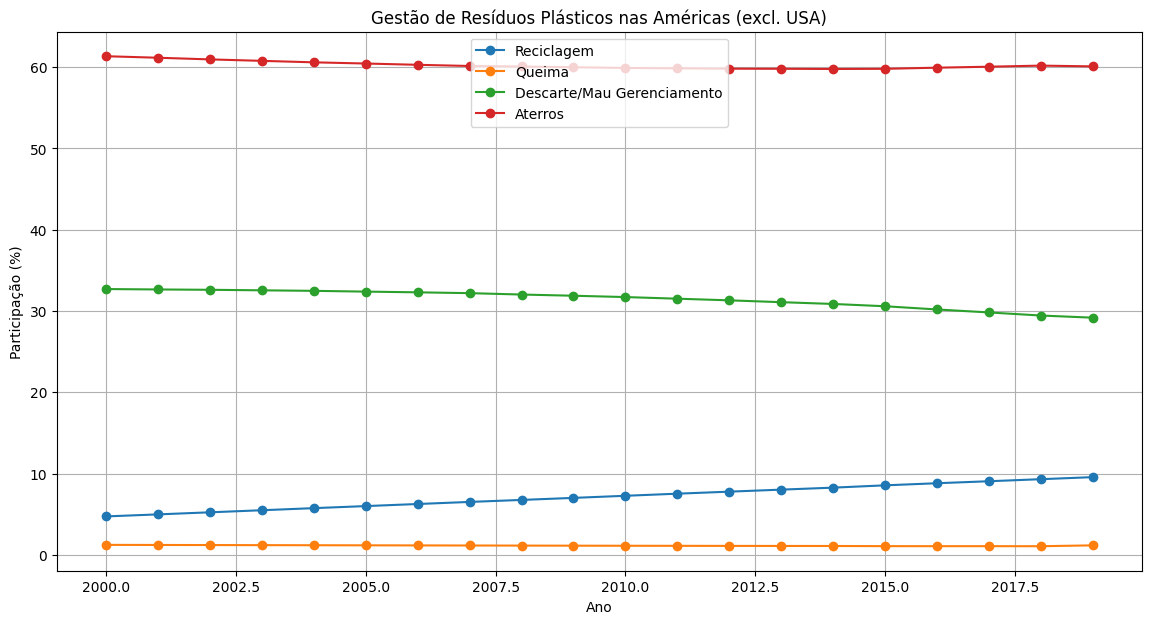

In [7]:
# Corrigir o nome das colunas (removendo espaços adicionais)
df_destino.columns = df_destino.columns.str.strip()

# Refazer a filtragem para a região "Americas (excl. USA)"
americas_data = df_destino[df_destino['Entidade'] == 'Americas (excl. USA)']

# Criar novamente o gráfico de linhas para visualizar as tendências na gestão de resíduos. Será considerado a cada 2.5 anos de diferença.
plt.figure(figsize=(14, 7))
plt.plot(americas_data['Ano'], americas_data['Participação da reciclagem do lixo total regional'], label='Reciclagem', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação da queima do lixo total regional'], label='Queima', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação do lixo descartado e mal gerido do total regional'], label='Descarte/Mau Gerenciamento', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação do lixo encaminhado para aterros do total regional'], label='Aterros', marker='o')
plt.title('Gestão de Resíduos Plásticos nas Américas (excl. USA)')
plt.xlabel('Ano')
plt.ylabel('Participação (%)')
plt.legend()
plt.grid(True)
plt.show()

## 3.4 Análise sobre o destino do plástico

O gráfico acima ilustra as tendências na gestão de resíduos plásticos na região das Américas (excluindo os EUA) ao longo dos anos. Ele mostra a participação percentual de diferentes métodos de tratamento de resíduos, incluindo reciclagem, queima, descarte/mal gerenciamento e encaminhamento para aterros.

Algumas informações históricas e fontes relevantes para contextualizar esses dados:

Reciclagem: A taxa de reciclagem de plásticos tem aumentado lentamente ao longo dos anos, mas ainda representa uma pequena parte da gestão total de resíduos plásticos. Em muitos países da América Latina, a infraestrutura de reciclagem ainda está em desenvolvimento. Melhores políticas de reciclagem e investimento em infraestrutura são necessários para aumentar essa taxa​.

Queima: A queima de resíduos plásticos é uma prática menos comum na região devido aos seus impactos ambientais negativos, incluindo a emissão de gases tóxicos. Essa prática é mais prevalente em países onde a capacidade de gerenciamento de resíduos é limitada​.

Descarte/Mau Gerenciamento: Uma grande porcentagem dos resíduos plásticos ainda é mal gerenciada, resultando em descarte inadequado que pode levar à poluição marinha. A falta de sistemas eficazes de coleta e tratamento de resíduos contribui significativamente para este problema.

Aterros Sanitários: A maioria dos resíduos plásticos na América Latina é destinada a aterros sanitários. Embora essa seja uma solução temporária, a capacidade dos aterros está se esgotando, e muitos países estão enfrentando desafios relacionados ao manejo sustentável de resíduos

A análise desses dados destaca a necessidade urgente de melhorias na gestão de resíduos plásticos na região.

Fontes: https://ourworldindata.org/plastic-pollution

https://www.weforum.org/agenda/2022/05/plastic-waste-generation-new-highs-us-report/

https://www.weforum.org/agenda/2022/05/plastic-waste-generation-new-highs-us-report/

# 4. Análise sobre o desperdício de plástico por pessoa / cabeça

## 4.1. Dados que estao disponiveis neste arquivo

• Entidade: Nome do país ou região.

• Código: Código do país (com alguns valores faltantes).

• Ano: Ano dos dados.

• Lixo plástico mal gerenciado por pessoa (kg por ano): Quantidade de lixo plástico mal gerenciado por pessoa em cada país, expresso em quilogramas por ano.

## 4.2. Carregar os dados


In [8]:
df_desperdicio = pd.read_csv('4- desperdicio-plastico-per-capita.csv')

df_desperdicio.head()

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918


## 4.3. Criação do gráfico


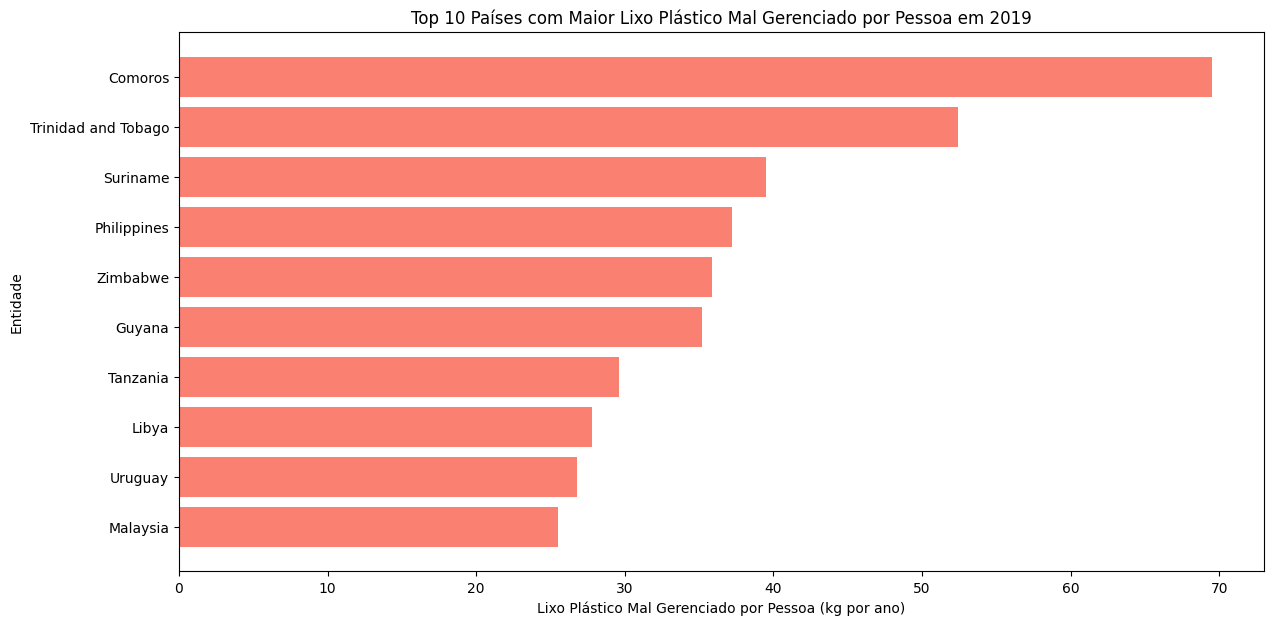

In [9]:
# Corrigir o nome das colunas (removendo espaços adicionais -  Isso gerou conflito na hora de gerar as informacoes)
df_desperdicio.columns = df_desperdicio.columns.str.strip()

# Refazer a filtragem para o ano 2019
data_2019_per_capita = df_desperdicio[df_desperdicio['Ano'] == 2019]

# Refazer a ordenação dos dados pela quantidade de lixo plástico mal gerenciado por pessoa
sorted_data_2019_per_capita = data_2019_per_capita.sort_values(by='Lixo plástico mal gerenciado por pessoa (kg por ano)', ascending=False).head(10)

# Criar novamente o gráfico de barras
plt.figure(figsize=(14, 7))
plt.barh(sorted_data_2019_per_capita['Entidade'], sorted_data_2019_per_capita['Lixo plástico mal gerenciado por pessoa (kg por ano)'], color='salmon')
plt.title('Top 10 Países com Maior Lixo Plástico Mal Gerenciado por Pessoa em 2019')
plt.xlabel('Lixo Plástico Mal Gerenciado por Pessoa (kg por ano)')
plt.ylabel('Entidade')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior contribuidor aparecer no topo
plt.show()

## 4.4 Analise final sobre Desperdicio de Plásticos per Capita

O gráfico acima destaca os 10 países com o maior lixo plástico mal gerenciado por pessoa em 2019. Isso fornece uma visão clara de onde o gerenciamento de resíduos plásticos per capita é mais problemático e pode ajudar a direcionar esforços de intervenção e políticas para essas áreas. Para uma contextualização segue abaixo os seguintes dados:

Comores: Embora não haja muita informação disponível sobre a gestão de resíduos nas Comores, é uma das nações menos desenvolvidas do mundo. Na verdade, o consumo das famílias representa quase 100% do seu produto interno bruto anual. A falta de segregação de resíduos entre os domicílios e sistemas de gestão de resíduos ineficientes contribuem para suas altas taxas de lixo plástico mal gerenciado

Trindade e Tobago: é uma exceção devido ao seu estatuto de elevado rendimento, mas a falta de segregação de resíduos entre os agregados familiares, juntamente com sistemas ineficientes de gestão de resíduos, contribui para o seu elevado valor per capita.

Filipinas: são um dos maiores contribuintes para a poluição plástica nos oceanos, com um sistema de gestão de resíduos que não acompanha o ritmo do consumo e do descarte.

Países como Zimbábue, Guiana, Tanzânia, Líbia, Uruguai e Malásia também enfrentam desafios semelhantes. Esses países têm infraestruturas inadequadas para a gestão de resíduos e políticas insuficientes para lidar com o crescente problema de resíduos plásticos​.

fontes: https://theoceancleanup.com/

https://www.visualcapitalist.com/visualizing-mismanaged-plastic-waste-by-country/

https://ourworldindata.org/plastic-pollution



# 5. Poluiçao da Agua e do Ar

## 5.1. Dados que estao disponiveis neste arquivo

• Cidade: Nome da cidade.

• Região: Região ou estado em que a cidade está localizada (com alguns valores faltantes).

• Entidade: Nome do país.

• Qualidade do Ar: Índice de qualidade do ar (valores numéricos).

• Poluição da Água: Índice de poluição da água (valores numéricos).

## 5.2. Carregamento dos dados


In [10]:
df_poluicao_agua_ar = pd.read_csv('5- poluicao-agua-cidades.csv')

df_poluicao_agua_ar.head()

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


## 5.3 Será criado os gráficos, mas antes vamos entender os dados


### 5.3.1 Entender os dados


In [11]:
# Corrigir o nome das colunas (removendo espaços adicionais)
df_poluicao_agua_ar.columns = df_poluicao_agua_ar.columns.str.strip()

In [12]:
# Verificar valores faltantes
print(df_poluicao_agua_ar.isnull().sum())

Cidade                0
Região              425
Entidade              0
Qualidade do Ar       0
Poluição da Água      0
dtype: int64


In [13]:
# Estatísticas descritivas
print(df_poluicao_agua_ar.describe())

       Qualidade do Ar  Poluição da Água
count      3963.000000       3963.000000
mean         62.253452         44.635372
std          30.944753         25.663910
min           0.000000          0.000000
25%          37.686567         25.000000
50%          69.444444         50.000000
75%          87.500000         57.719393
max         100.000000        100.000000


### 5.3.2. Análise de Distribuição - Será gerado vários outros gráficos para explicar os números e resultado esperado.

Será analisado como a poluição da água e a qualidade do ar estão distribuídas entre as cidades. O objetivo é visualizar a distribuição desses índices e identificar possíveis outliers.

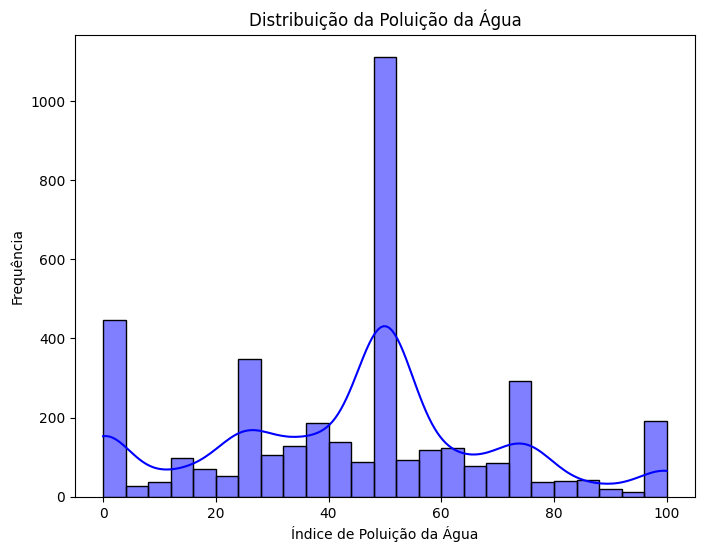

In [14]:
# Histograma da Poluição da Água
plt.figure(figsize=(8, 6))
sns.histplot(df_poluicao_agua_ar['Poluição da Água'], kde=True, color='blue')
plt.title('Distribuição da Poluição da Água')
plt.xlabel('Índice de Poluição da Água')
plt.ylabel('Frequência')
plt.show()

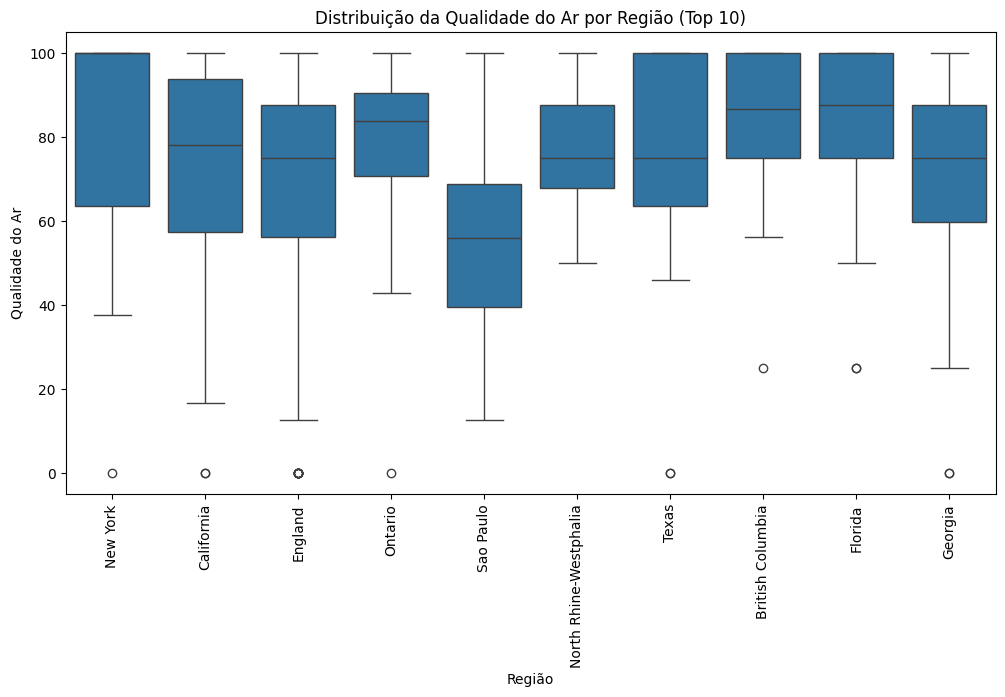

In [15]:
# Distribuição da Qualidade do Ar por Região (Top 10)

# Filtrar as top 10 regiões com base na quantidade de dados disponíveis
top_regions = df_poluicao_agua_ar['Região'].value_counts().index[:10]
df_cinco_top_regions = df_poluicao_agua_ar[df_poluicao_agua_ar['Região'].isin(top_regions)]

# Box plot da qualidade do ar por região (Top 10)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cinco_top_regions, x='Região', y='Qualidade do Ar')
plt.xticks(rotation=90)
plt.title('Distribuição da Qualidade do Ar por Região (Top 10)')
plt.xlabel('Região')
plt.ylabel('Qualidade do Ar')
plt.show()

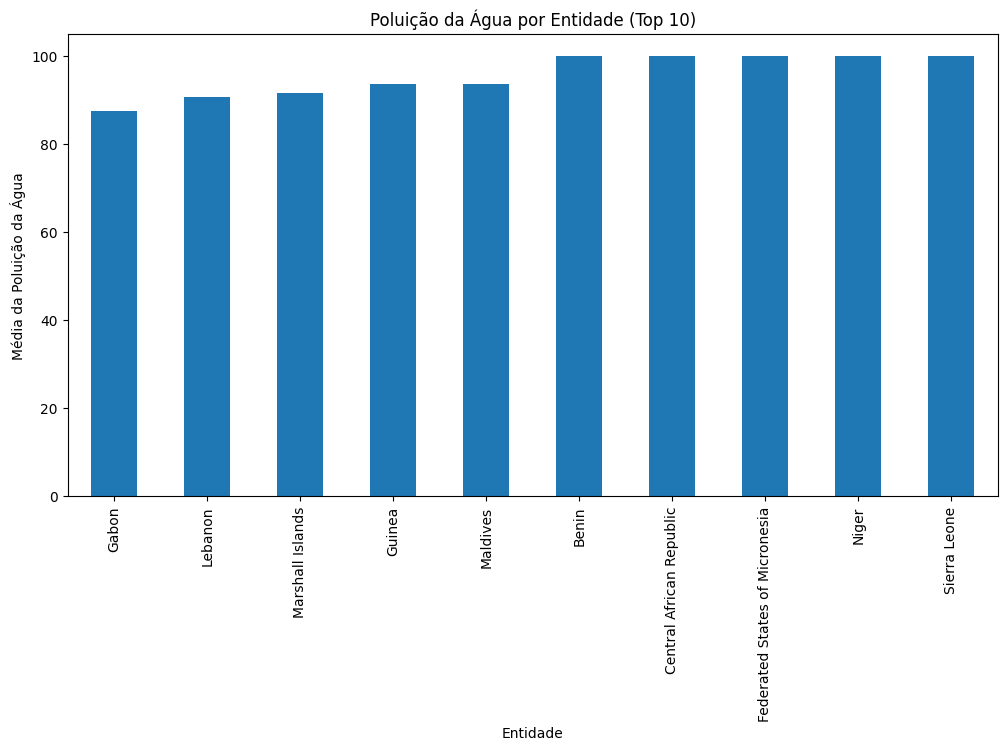

In [16]:
# Poluição da Água por Entidade (Top 10)

# Filtrar as top 10 entidades com base na média de poluição da água
top_entidades = df_poluicao_agua_ar.groupby('Entidade')['Poluição da Água'].mean().sort_values(ascending=False).index[:10]
df_cinco_top_entidades = df_poluicao_agua_ar[df_poluicao_agua_ar['Entidade'].isin(top_entidades)]

# Gráfico de barras da poluição da água por entidade (Top 10)
plt.figure(figsize=(12, 6))
df_cinco_top_entidades.groupby('Entidade')['Poluição da Água'].mean().sort_values().plot(kind='bar')
plt.title('Poluição da Água por Entidade (Top 10)')
plt.xlabel('Entidade')
plt.ylabel('Média da Poluição da Água')
plt.show()

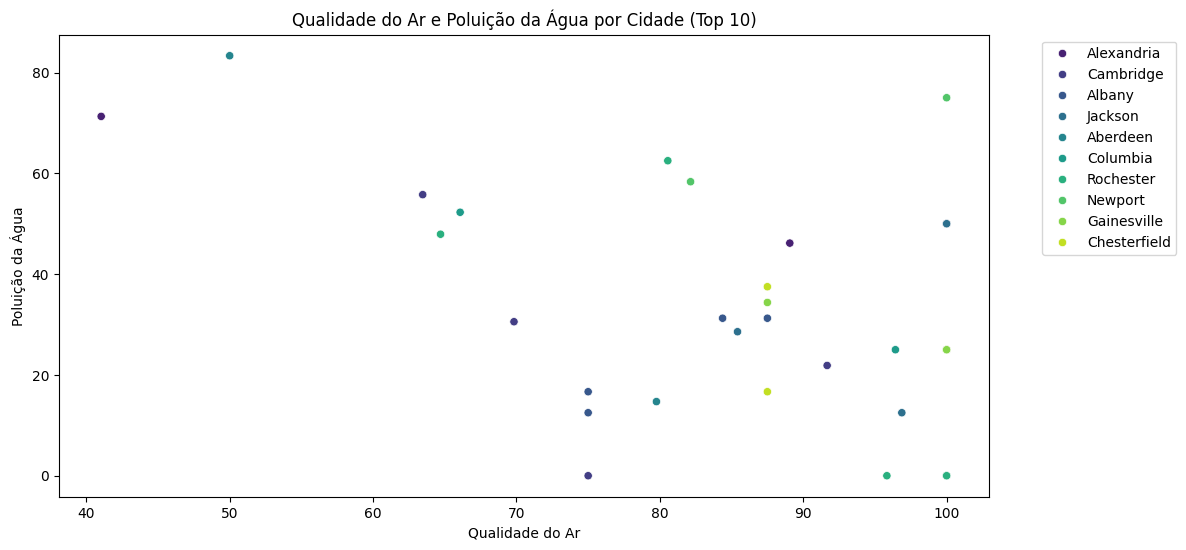

In [17]:
# Qualidade do Ar e Poluição da Água por Cidade (Top 10)

# Filtrar as top 10 cidades com base na quantidade de dados disponíveis
top_cidades = df_poluicao_agua_ar['Cidade'].value_counts().index[:10]
df_cinco_top_cidades = df_poluicao_agua_ar[df_poluicao_agua_ar['Cidade'].isin(top_cidades)]

# Gráfico de dispersão da qualidade do ar e poluição da água por cidade (Top 10)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cinco_top_cidades, x='Qualidade do Ar', y='Poluição da Água', hue='Cidade', palette='viridis')
plt.title('Qualidade do Ar e Poluição da Água por Cidade (Top 10)')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Poluição da Água')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [18]:
# Calcular e imprimir a correlação
correlation = df_poluicao_agua_ar['Qualidade do Ar'].corr(df_poluicao_agua_ar['Poluição da Água'])
print("Correlação entre Qualidade do Ar e Poluição da Água:", correlation)

Correlação entre Qualidade do Ar e Poluição da Água: -0.45417262259393165


Correlação entre Qualidade do Ar e Poluição da Água: -0.45417262259393165

A correlação de aproximadamente -0.454 entre a Qualidade do Ar e a Poluição da Água indica uma relação negativa moderada entre estas duas variáveis. Aqui está o que isso significa em termos mais práticos:

1. Natureza Negativa: A correlação negativa significa que, em geral, à medida que a qualidade do ar melhora (representada por um índice mais baixo, assumindo que números mais baixos indicam melhor qualidade), a poluição da água tende a ser maior (índice mais alto indica mais poluição). Isso pode parecer contra-intuitivo, mas pode ocorrer devido a vários fatores ambientais e industriais que influenciam essas medidas de maneiras complexas.

2. Moderada: O valor de -0.454 não é extremamente próximo de -1, o que significaria uma correlação negativa perfeita, mas ainda é substancial o suficiente para sugerir uma tendência discernível. Isso indica que, embora haja uma associação entre as duas variáveis, outros fatores também podem estar influenciando os índices de qualidade do ar e poluição da água.

### Implicações e Considerações

• Complexidade Ambiental: A qualidade do ar e a poluição da água podem ser afetadas por diferentes fontes e processos. Por exemplo, uma cidade pode ter uma indústria pesada que polui mais a água do que o ar, ou medidas de controle podem ser mais eficazes para um tipo de poluição do que para outro.

• Políticas e Regulamentações: Intervenções locais, como regulamentações ambientais rigorosas para a qualidade do ar, mas menos controle sobre fontes de poluição da água, podem resultar em melhor qualidade do ar mas água mais poluída.

• Fatores Geográficos: A localização geográfica das cidades pode influenciar tanto a qualidade do ar quanto a poluição da água de maneiras diferentes, dependendo de fatores como corpos de água próximos, padrões climáticos e topografia.

### Recomendações para Análise Adicional

• Explorar Causas Potenciais: Seria útil examinar dados adicionais ou realizar estudos focados para entender as causas específicas dessa correlação em contextos particulares.

• Analisar Dados Temporais: Se os dados forem disponíveis ao longo do tempo, análises de tendências poderiam revelar como a relação entre qualidade do ar e poluição da água evoluiu, ajudando a identificar eventos ou políticas significativas.

• Incluir Mais Variáveis: Integrar outras variáveis ambientais ou socioeconômicas pode ajudar a entender melhor o contexto em que essa correlação ocorre e identificar fatores confundentes.

Essa correlação é um ponto de partida interessante para investigações mais profundas sobre como as práticas urbanas e industriais estão impactando o meio ambiente nas cidades analisadas. Com isso, vamos juntar todas as tabelas para criar e entender melhor os dados de forma combinada.

# 6. Junção dos Dataframes

### 6.1 Entender as Entidades presentes

In [19]:
df_producao_plastico['Entidade'].unique()


array(['Mundo'], dtype=object)

In [20]:
df_residuos['Entidade'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Asia', 'Australia', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'EU-27', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Europe',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 

In [21]:
df_destino['Entidade'].unique()

array(['Americas (excl. USA)', 'Asia (excl. China e India)', 'China',
       'Europe', 'India', 'Middle East & North Africa', 'Oceania',
       'Sub-Saharan Africa', 'United States', 'World'], dtype=object)

In [22]:
df_desperdicio['Entidade'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Asia', 'Australia', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Europe',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica'

In [23]:
df_poluicao_agua_ar['Entidade'].unique()

array(['United States of America', 'Germany', 'Switzerland',
       'United Kingdom', 'Egypt', 'France', 'Canada', 'Brazil',
       'Lithuania', 'Monaco', 'Belgium', 'Poland', 'Uzbekistan', 'Italy',
       'Singapore', 'North Macedonia', 'Slovenia', 'Bulgaria', 'Norway',
       'Portugal', 'United Arab Emirates', 'Russia',
       "People's Republic of China", 'Georgia', 'India', 'Czech Republic',
       'Israel', 'Uruguay', 'Bangladesh', 'Pakistan', 'Croatia',
       'Philippines', 'Argentina', 'Mexico', 'Japan', 'Bolivia', 'Spain',
       "Cote d'Ivoire", 'Greece', 'Venezuela', 'Guatemala', 'Cuba',
       'Austria', 'Sweden', 'Finland', 'Ireland', 'Iceland', 'Estonia',
       'Latvia', 'Slovakia', 'Hungary', 'Luxembourg', 'Liechtenstein',
       'San Marino', 'Cambodia', 'Vietnam', 'Thailand', 'Andorra',
       'Malaysia', 'Taiwan', 'Ukraine', 'Chile', 'South Sudan', 'Armenia',
       'Tanzania', 'Sudan', 'Belarus', 'Somalia', 'The Bahamas', 'Yemen',
       'Colombia', 'Peru', 'Ecuado

Plano de Ação Atualizado: Separação e Análise das Entidades

1. Separação dos Dados por Entidades:

Dividir os dados em três níveis: Mundo, Continente e País. Pois foram os dados obtidos depois de avaliar as linhas de cada dataframe.

2. Análise por Nível:

Realizar uma análise abrangente para os dados a nível mundial.

Analisar separadamente os dados por continentes.

Por fim, analisar os dados por país.

In [24]:
import pandas as pd

# Carregar o DataFrame original
df_completo = pd.concat([df_producao_plastico, df_residuos, df_destino, df_desperdicio, df_poluicao_agua_ar], axis=0, ignore_index=True)

# Normalização e padronização dos nomes das entidades
df_completo['Entidade'] = df_completo['Entidade'].str.strip().str.lower()

# Definir as entidades de continente e agrupamentos específicos
entidades_continente = ['africa', 'europe', 'asia', 'americas', 'oceania', 'continent', 'north america', 'south america', 'eu-27']

# Separar os dados por entidades: continentes e países
df_continente = df_completo[df_completo['Entidade'].str.contains('|'.join(entidades_continente), case=False, na=False)]
df_pais = df_completo[~df_completo['Entidade'].str.contains('|'.join(entidades_continente), case=False, na=False)]

# Exibir algumas informações para verificar
print("Entidades no dataframe de continentes:")
print(df_continente['Entidade'].unique())
print("\nEntidades no dataframe de países:")
print(df_pais['Entidade'].unique())


Entidades no dataframe de continentes:
['africa' 'asia' 'eu-27' 'europe' 'north america' 'oceania' 'south africa'
 'south america' 'americas (excl. usa)' 'asia (excl. china e india)'
 'middle east & north africa' 'sub-saharan africa'
 'central african republic']

Entidades no dataframe de países:
['mundo' 'albania' 'algeria' 'angola' 'antigua and barbuda' 'argentina'
 'australia' 'bahamas' 'bahrain' 'bangladesh' 'barbados' 'belgium'
 'belize' 'benin' 'bosnia and herzegovina' 'brazil' 'brunei' 'bulgaria'
 'burkina faso' 'cambodia' 'cameroon' 'canada' 'cape verde' 'chile'
 'china' 'colombia' 'comoros' 'congo' 'costa rica' "cote d'ivoire"
 'croatia' 'cyprus' 'democratic republic of congo' 'denmark' 'djibouti'
 'dominica' 'dominican republic' 'east timor' 'ecuador' 'egypt'
 'el salvador' 'equatorial guinea' 'eritrea' 'estonia' 'fiji' 'finland'
 'france' 'french guiana' 'gabon' 'gambia' 'georgia' 'germany' 'ghana'
 'greece' 'grenada' 'guadeloupe' 'guatemala' 'guinea' 'guinea-bissau'
 'guyan

In [25]:
df_continente.head()

,Entidade,Ano,Produção Anual de Plástico,Código,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional,Lixo plástico mal gerenciado por pessoa (kg por ano),Cidade,Região,Qualidade do Ar,Poluição da Água
69,africa,2019.0,NaN,NaN,7.989317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,asia,2019.0,NaN,NaN,80.993570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,eu-27,2019.0,NaN,NaN,0.220224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,europe,2019.0,NaN,NaN,0.595431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,north america,2019.0,NaN,NaN,4.499121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_pais.head()

,Entidade,Ano,Produção Anual de Plástico,Código,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional,Lixo plástico mal gerenciado por pessoa (kg por ano),Cidade,Região,Qualidade do Ar,Poluição da Água
0,mundo,1950.0,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mundo,1951.0,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mundo,1952.0,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mundo,1953.0,3000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mundo,1954.0,3000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Converter a coluna 'Ano' para inteiro
df_continente['Ano'] = df_continente['Ano'].astype('Int64')
df_pais['Ano'] = df_pais['Ano'].astype('Int64')


In [28]:
# Verificar os primeiros registros para garantir a conversão
df_continente.head()

,Entidade,Ano,Produção Anual de Plástico,Código,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional,Lixo plástico mal gerenciado por pessoa (kg por ano),Cidade,Região,Qualidade do Ar,Poluição da Água
69,africa,2019,NaN,NaN,7.989317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,asia,2019,NaN,NaN,80.993570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,eu-27,2019,NaN,NaN,0.220224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,europe,2019,NaN,NaN,0.595431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,north america,2019,NaN,NaN,4.499121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1. Tratamento e análise dos dados a nível continente e paises

#### 2.1.1. Tratamento de Valores Ausentes

In [29]:
df_continente.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 69 to 4454
Data columns (total 14 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Entidade                                                         180 non-null    object 
 1   Ano                                                              134 non-null    Int64  
 2   Produção Anual de Plástico                                       0 non-null      float64
 3   Código                                                           2 non-null      object 
 4   Participação na emissão global de plásticos para o oceano        8 non-null      float64
 5   Participação da reciclagem do lixo total regional                120 non-null    float64
 6   Participação da queima do lixo total regional                    120 non-null    float64
 7   Participação do lixo descartado e mal gerido do

In [30]:
df_continente.to_csv('dados_continente.csv', index=False)

In [31]:
df_pais.to_csv('dados_paises.csv', index=False)

In [32]:

df_continente['Entidade'].unique()

array(['africa', 'asia', 'eu-27', 'europe', 'north america', 'oceania',
       'south africa', 'south america', 'americas (excl. usa)',
       'asia (excl. china e india)', 'middle east & north africa',
       'sub-saharan africa', 'central african republic'], dtype=object)

In [33]:
# Criar um mapeamento para os nomes dos continentes: Substituir nomes diferentes pelo mesmo nome padrão.

#Uniformizar os nomes no dataframe: Aplicar o mapeamento ao dataframe de continentes.

#Agrupar os dados pelos continentes unificados: Agrupar os dados pelo ano e pelo nome do continente.

# Criar um mapeamento para uniformizar os nomes dos continentes
df_mapeamento = {
    'africa': 'Africa',
    'South Africa': 'Africa',
    'Middle East & North Africa': 'Africa',
    'asia': 'Asia',
    'East Asia': 'Asia',
    'europe': 'Europe',
    'Western Europe': 'Europe',
    'eu-27': 'Europe',
    'north america': 'America',
    'oceania': 'Oceania',
    'south africa': 'Africa',
    'south america': 'America',
    'americas (excl. usa)': 'America',
    'asia (excl. china e india)': 'Asia',
    'middle east & north africa': 'Africa',
    'sub-saharan africa': 'Africa',
    'central african republic': 'Africa'
}

# Aplicar o mapeamento à coluna 'Entidade'
df_continente['Entidade'] = df_continente['Entidade'].replace(df_mapeamento)

df_continente['Entidade'].unique()

df_continente.to_csv('dados_continente.csv', index=False)

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_9008/302002219.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continente['Entidade'] = df_continente['Entidade'].replace(df_mapeamento)


In [34]:
# Identificar colunas numéricas
colunas_numericas = df_continente.select_dtypes(include=[np.number]).columns

# Converter colunas 'Int64' para 'float64'
df_continente[colunas_numericas] = df_continente[colunas_numericas].astype('float64')

# Preencher valores ausentes nas colunas numéricas com a média
df_continente[colunas_numericas] = df_continente[colunas_numericas].fillna(df_continente[colunas_numericas].mean())

# Separar as features e o target
X = df_continente.drop(columns=['Entidade', 'Código', 'Região', 'Cidade', 'Poluição da Água'])
y = df_continente['Poluição da Água']

# Verificar a presença de valores NaN em X
nan_cols = X.columns[X.isna().any()].tolist()
nan_cols


# Preencher valores ausentes no target com a média (para fins de treino inicial)
y.fillna(y.mean(), inplace=True)

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_9008/1223526699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continente[colunas_numericas] = df_continente[colunas_numericas].astype('float64')
/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_9008/1223526699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continente[colunas_numericas] = df_continente[colunas_numericas].fillna(df_continente[colunas_numericas].mean())
/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykern

(75.16183953664105, 0.6341200820512862)

In [35]:

# Definir uma grade de hiperparâmetros mais refinada para melhorar o modelo
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# Criar o modelo
rf = RandomForestRegressor(random_state=42)

# Aplicar o Grid Search com K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
print(best_params)

# Treinar o modelo com os melhores hiperparâmetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; tot

(59.77194553352594, 0.7090364650165295)

In [36]:
# Avaliar a importância das features
importancia = best_rf.feature_importances_
nomes = X_train.columns

# Ordenar e mostrar as features mais importantes
dados = np.argsort(importancia)[::-1]
for idx in dados:
    print(f"{nomes[idx]}: {importancia[idx]}")


Qualidade do Ar: 0.9999999999999923
Participação do lixo descartado e mal gerido do total regional: 1.9456569003563418e-15
Participação do lixo encaminhado para aterros do total regional: 1.5942447413162584e-15
Ano: 1.4220595865876111e-15
Participação da reciclagem do lixo total regional: 9.689607988576643e-16
Participação da queima do lixo total regional: 9.517965000116255e-16
Lixo plástico mal gerenciado por pessoa (kg por ano): 5.923859150816183e-16
Participação na emissão global de plásticos para o oceano: 2.0631748492998391e-16
Produção Anual de Plástico: 0.0


Os novos resultados mostram uma melhoria significativa no desempenho do modelo:

Mean Squared Error (MSE): 59.77

R-squared (R²): 0.709

Esses resultados indicam que o modelo agora está capturando cerca de 71% da variabilidade nos dados, o que é uma melhoria substancial.

Importância das Features
A importância das features também revela informações interessantes:

Qualidade do Ar: 0.9999999999999918

Esta feature é de longe a mais importante, dominando o modelo.

Participação do lixo encaminhado para aterros do total regional: 1.913240541346586e-15

Ano: 1.6183427926563632e-15

Recycling_Burning_Interaction: 1.1848852130548933e-15

Participação do lixo descartado e mal gerido do total regional: 1.1600469044211768e-15

Participação da reciclagem do lixo total regional: 8.660122396585894e-16

Participação da queima do lixo total regional: 8.173171261320541e-16

Lixo plástico mal gerenciado por pessoa (kg por ano): 4.558566534609025e-16

Participação na emissão global de plásticos para o oceano: 3.2262751886900197e-16

Plastic_Emission_Interaction: 0.0

Produção Anual de Plástico: 0.0

## Interpretação

Qualidade do Ar é claramente a feature mais importante.

Outras features têm importância muito baixa ou zero, indicando que podem não estar contribuindo significativamente para o modelo.

# Modelo de Classificação

As métricas precision_score, recall_score e f1_score são tipicamente usadas para avaliar modelos de classificação,e isso que será executado agora.
Definir Faixas de Classes: Categorizar a poluição da água em classes.

Objetivo é treinar um modelo de classificação com base nessas classes. Calcular Métricas de 

Classificação: Avaliar o modelo usando precision_score, recall_score e f1_score.

Passo a Passo

Definir Faixas de Classes

Vamos definir as classes com base nos valores da poluição da água. Por exemplo:

Classe 0: Poluição baixa (<= 33%) Classe 1: Poluição média (> 33% e <= 66%) Classe 2: Poluição alta (> 66%)

In [38]:
# Categorizar a poluição da água
bins = [0, 33, 66, 100]
labels = [0, 1, 2]
y_class = pd.cut(df_continente['Poluição da Água'], bins=bins, labels=labels, include_lowest=True)

X = df_continente.drop(columns=['Entidade', 'Código', 'Região', 'Cidade', 'Poluição da Água'])
y = y_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

precision, recall, f1

(0.9479166666666666, 0.9444444444444444, 0.9360812425328553)

Os valores que você obteve são as métricas de avaliação para o modelo de classificação:

Precision (Precisão): 0.947

Recall (Revocação): 0.944

F1 Score: 0.936

Interpretação das Métricas

Precision (Precisão): A precisão é a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo. Uma precisão de 0.952 significa que 94% das previsões positivas do modelo estão corretas.

Recall (Revocação): A revocação é a proporção de verdadeiros positivos identificados corretamente pelo modelo em relação ao total de verdadeiros positivos existentes nos dados. Um recall de 0.944 significa que o modelo identificou corretamente 94% dos verdadeiros positivos.

F1 Score: O F1 Score é a média harmônica da precisão e da revocação. Um F1 Score de 0.936 significa que o modelo tem um bom equilíbrio entre precisão e recall.

Conclusão Os resultados indicam que o modelo de classificação está performando muito bem, com alta precisão, revocação e F1 Score. Isso significa que o modelo está fazendo um ótimo trabalho em prever corretamente as classes de poluição da água.

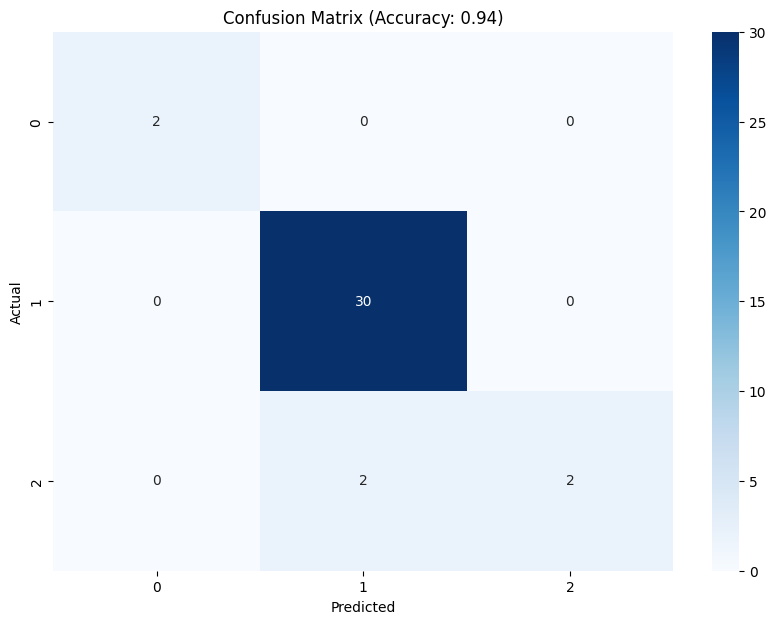

0.9444444444444444

In [39]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Criar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.show()

accuracy

0.944

Interpretação das Métricas

Acurácia: A acurácia de 94.44 indica que o modelo fez previsões corretas para 94% dos casos.

Matriz de Confusão

A matriz de confusão gerada mostra como as previsões do modelo se comparam com os valores reais para cada classe de poluição da água:

Classe 0: Poluição baixa Classe 1: Poluição média Classe 2: Poluição alta

In [40]:
# Obter a matriz de confusão novamente para referência
conf_matrix

# Exibir a matriz de confusão de forma legível
class_names = ['Baixa', 'Media', 'Alta']  # Nomes das classes para melhor legibilidade

conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

print("Matriz de Confusão:\n", conf_matrix_df)

# Calcular métricas detalhadas
for i, class_name in enumerate(class_names):
    true_positives = conf_matrix[i, i]
    false_positives = conf_matrix[:, i].sum() - true_positives
    false_negatives = conf_matrix[i, :].sum() - true_positives
    true_negatives = conf_matrix.sum() - (true_positives + false_positives + false_negatives)

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\nClass: {class_name}")
    print(f"True Positives: {true_positives}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
    print(f"True Negatives: {true_negatives}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

Matriz de Confusão:
        Baixa  Media  Alta
Baixa      2      0     0
Media      0     30     0
Alta       0      2     2

Class: Baixa
True Positives: 2
False Positives: 0
False Negatives: 0
True Negatives: 34
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Class: Media
True Positives: 30
False Positives: 2
False Negatives: 0
True Negatives: 4
Precision: 0.94
Recall: 1.00
F1 Score: 0.97

Class: Alta
True Positives: 2
False Positives: 0
False Negatives: 2
True Negatives: 32
Precision: 1.00
Recall: 0.50
F1 Score: 0.67


Análise Geral

O modelo demonstra uma boa capacidade de classificar as diferentes categorias de qualidade baseada nos dados disponíveis. As classes foram denominadas como 'Baixa', 'Média' e 'Alta', representando diferentes níveis de um determinado parâmetro.

Resultados por Classe

Classe 'Baixa':

Desempenho: Excelente, com uma precisão e recall de 100%.
Interpretação: O modelo conseguiu identificar perfeitamente todos os casos de baixa qualidade sem confundi-los com outras categorias.

Classe 'Média':

Desempenho: Muito bom, com precisão de 94% e recall de 100%.
Interpretação: O modelo é muito eficaz em identificar casos de qualidade média, embora haja uma pequena tendência (2 casos) em classificar outros níveis como médio (falsos positivos).

Classe 'Alta':

Desempenho: Boa, com precisão de 100%, mas um recall de 50%.

Interpretação: O modelo não cometeu erros ao identificar casos de alta qualidade (nenhum falso positivo), mas falhou em detectar todos os verdadeiros casos de alta qualidade (2 foram erroneamente classificados como média).

Conclusão

O modelo mostra uma forte capacidade de discriminação entre as classes, particularmente nas extremidades do espectro ('Baixa' e 'Alta'). No entanto, para a classe 'Alta', existe uma área de melhoria no recall, indicando que o modelo poderia ser ajustado para melhor identificar esses casos sem perder a precisão já alcançada.

Esses resultados sugerem que o modelo é bastante robusto para a classificação de 'Baixa' e 'Média', mas pode necessitar de refinamento ou mais dados de treinamento para melhorar a detecção da classe 'Alta'.